Cols. 1,2: (X,Y) stellar position in a reference system where the cluster center is in (5000,5000)
Col.  3: F275W calibrated magnitude
Col.  4: F275W photometric RMS
Col.  5: F275W quality-fit parameter
Col.  6: F275W sharp parameter 
Col.  7: Number of F275W exposures the source is found in [99: saturated star]
Col.  8: Number of F275W exposures the source is well measured [99: saturated star]
Col.  9: F336W calibrated magnitude
Col. 10: F336W photometric RMS
Col. 11: F336W quality-fit parameter
Col. 12: F336W sharp parameter
Col. 13: Number of F336W exposures the source is found in [99: saturated star]
Col. 14: Number of F336W exposures the source is well measured [99: saturated star]
Col. 15: F438W calibrated magnitude
Col. 16: F438W photometric RMS
Col. 17: F438W quality-fit parameter
Col. 18: F438W sharp parameter 
Col. 19: Number of F438W exposures the source is found in [99: saturated star]
Col. 20: Number of F438W exposures the source is well measured [99: saturated star]
Col. 21: F606W calibrated magnitude
Col. 22: F606W photometric RMS
Col. 23: F606W quality-fit parameter
Col. 24: F606W sharp parameter 
Col. 25: Number of F606W exposures the source is found in [99: saturated star]
Col. 26: Number of F606W exposures the source is well measured [99: saturated star]
Col. 27: F814W calibrated magnitude
Col. 28: F814W photometric RMS
Col. 29: F814W quality-fit parameter
Col. 30: F814W sharp parameter
Col. 31: Number of F814W exposures the source is found in [99: saturated star]
Col. 32: Number of F814W exposures the source is well measured [99: saturated star]
Col. 33: Membership Probability [-1.0: not available]
Cols. 34,35: Right ascension (J2000, epoch 2015.0) and 
             Declination (J2000, epoch J2015.0) of the star, astrometrized using Gaia DR1 (Lindegren et al. 2016)  
Cols. 36: Identification number of the star
Cols. 37: Iteration the star was found 
          1-5: found in F606W & F814W images 
            6: found in F438W  images 
            7: found in F336W  images 
            8: found in F275W  image

I will be using pandas to work with the dataset and matplotlib to plot the graph

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The dataset is located at "https://archive.stsci.edu/hlsps/hugs/ngc2808/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt"
I will be using the requests library to save the file to NGC2808.txt
I will also need tp remove the comments and put the rest of the file conttents into a dataframe

In [2]:
'''
import requests as rq
file=rq.get('https://archive.stsci.edu/hlsps/hugs/ngc2808/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt', allow_redirects=True)
open('NGC2808.txt', 'wb').write(file.content)
'''

"\nimport requests as rq\nfile=rq.get('https://archive.stsci.edu/hlsps/hugs/ngc2808/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt', allow_redirects=True)\nopen('NGC2808.txt', 'wb').write(file.content)\n"

Loading the entire file into a dataframe takes up a lot of memory. A more space efficient way would be to load only the necessary columns into a dataframe.
An even more efficient way would be to simply load the necessary columns into a numpy array directly .

In [3]:
'''
dataset=open('NGC2808.txt', mode='r')
first_ele="#"
skip_rows=0
while first_ele=="#":
    skip_rows+=1
    first_ele=dataset.readline()[0]
dataset.close()
data=pd.read_fwf('https://archive.stsci.edu/hlsps/hugs/ngc2808/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt',skiprows=skip_rows, usecols=[0,1,2,8,32], header=None)
'''

'\ndataset=open(\'NGC2808.txt\', mode=\'r\')\nfirst_ele="#"\nskip_rows=0\nwhile first_ele=="#":\n    skip_rows+=1\n    first_ele=dataset.readline()[0]\ndataset.close()\ndata=pd.read_fwf(\'https://archive.stsci.edu/hlsps/hugs/ngc2808/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt\',skiprows=skip_rows, usecols=[0,1,2,8,32], header=None)\n'

Now that I have the required data, I simply need to plot the scatter plot

In [4]:
'''
data_array=data.to_numpy()
f275_mag=data_array[:,2]
f336_mag=data_array[:,3]
prob=data_array[:,4]
'''
from matplotlib import use


file_name='https://archive.stsci.edu/hlsps/hugs/ngc2808/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt'
f275_mag=np.loadtxt(file_name, usecols=(2), comments='#')
f336_mag=np.loadtxt(file_name, usecols=(8), comments='#')   #R
f438_mag=np.loadtxt(file_name, usecols=(14), comments='#')    #G
f606_mag=np.loadtxt(file_name, usecols=(20), comments='#')    #B
f814_mag=np.loadtxt(file_name, usecols=(26), comments='#')
prob=np.loadtxt(file_name, usecols=(32), comments='#')
x_coord=np.loadtxt(file_name, usecols=(0), comments='#')
y_coord=np.loadtxt(file_name, usecols=(1), comments='#')

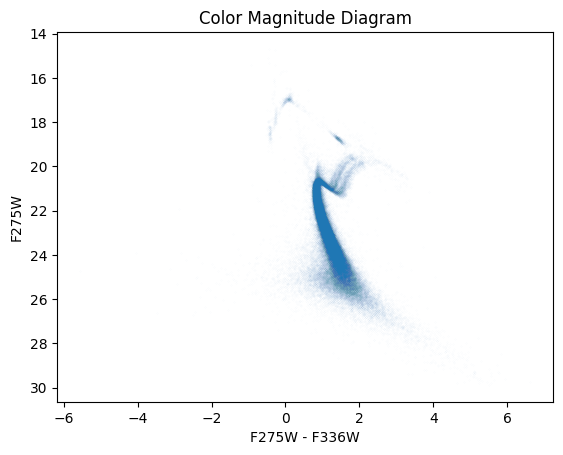

In [5]:
filtering=(f275_mag>0) & (f336_mag>0) & (prob>90) #removing Nan values and using values with probability greater than 90%
y_axis=f275_mag[filtering]
x_axis=f275_mag[filtering]-f336_mag[filtering]
plt.scatter(x_axis,y_axis,s=0.0001)
plt.gca().invert_yaxis() #inverting the y-axis
plt.title("Color Magnitude Diagram")
plt.ylabel("F275W")
plt.xlabel("F275W - F336W")
plt.savefig('ColorMagnitudeDiagram.svg')

Visualisation of the cluster using its x, y coordinates in Columns 0,1 and its magnitude(for size)

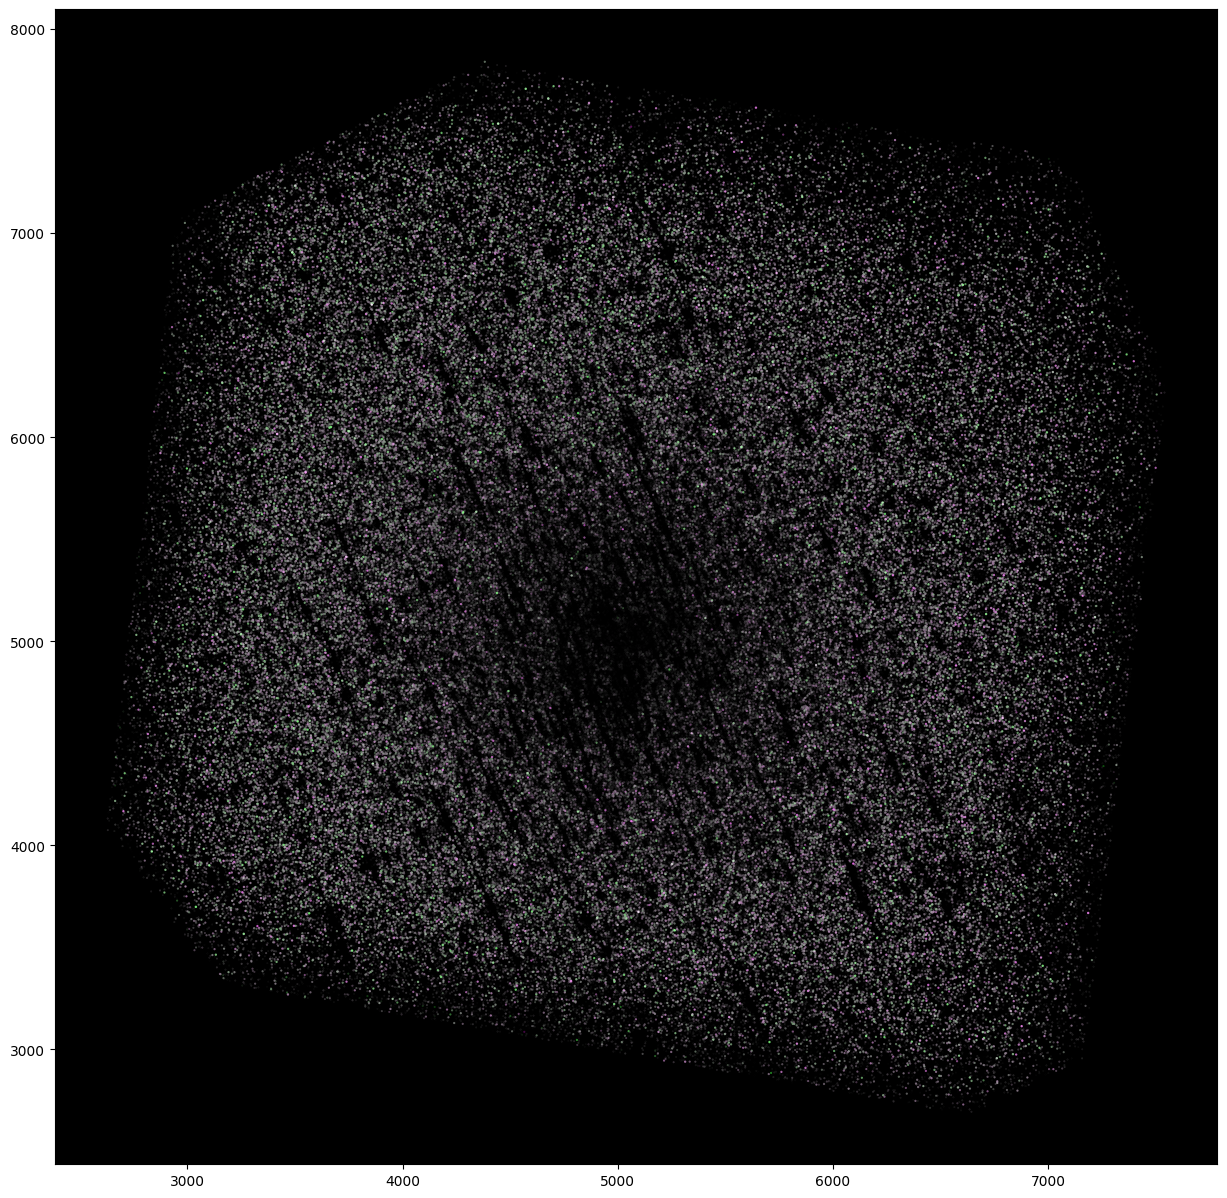

In [13]:
filtering_values=(f275_mag>0) & (f336_mag>0) & (f438_mag>0) & (f606_mag>0) & (f814_mag>0) & (x_coord>=0) & (y_coord>=0)
mag=(f275_mag[filtering_values]*f275_mag[filtering_values]) + (f336_mag[filtering_values]*f336_mag[filtering_values]) + (f438_mag[filtering_values]*f438_mag[filtering_values]) + (f606_mag[filtering_values]*f606_mag[filtering_values]) + (f814_mag[filtering_values]*f814_mag[filtering_values])
r=f336_mag[filtering_values]
g=f438_mag[filtering_values]
b=f606_mag[filtering_values]
x_values=x_coord[filtering_values]
y_values=y_coord[filtering_values]

'''
#alternative color scheme (showing relative colors)
r=r-r.mean()
g=g-g.mean()
b=b-b.mean()
'''

#need to normalise the rgb values
mag=(mag-np.amin(mag))/(np.amax(mag)-np.amin(mag))
b=(r-np.amin(r))/(np.amax(r)-np.amin(r))
g=(g-np.amin(g))/(np.amax(g)-np.amin(g))
r=(b-np.amin(b))/(np.amax(b)-np.amin(b))

#area
factor = 1
area = factor * mag * mag  * mag # Area of each plotted point
colors = np.column_stack((r, g, b)) # Given white color to each point, black background
colors=colors*colors

#blending value for scatter plot
alpha=mag

# To change background color
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor([0,0,0])
plt.scatter(x_values,y_values,s=area, c=colors, alpha=alpha)
#plt.savefig('visualisation.svg')
plt.savefig('visualisation.png', dpi=600)